In [312]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression , Lasso , Ridge , LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

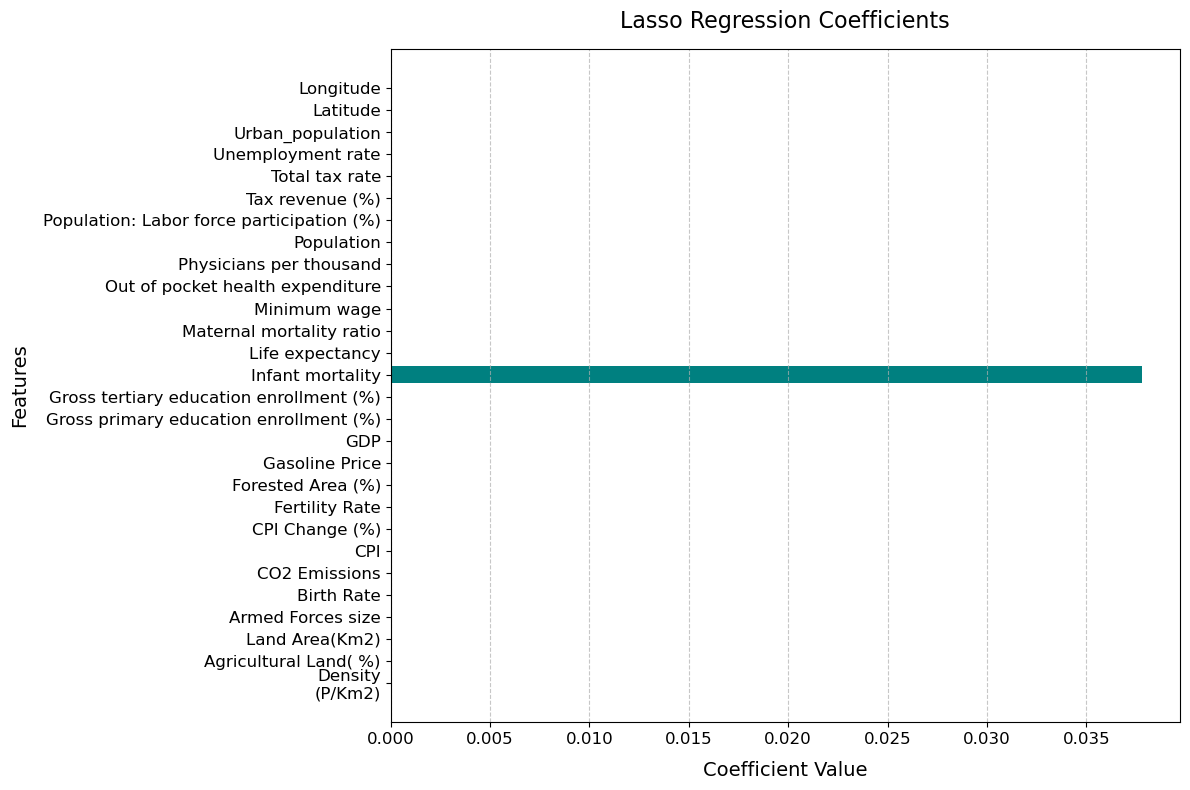

In [313]:
# Getting whole wildfire data set
#wildfire_df = pd.read_csv("2- annual-area-burnt-by-wildfires.csv")
wildfire_df = pd.read_csv("share-of-the-total-land-area-burnt-by-wildfires-each-year.csv")

# Filtering wildfire data set for just 2023 as our features are for 2023
wildfire_df = wildfire_df[wildfire_df['Year'] == 2023]

wildfire_df = wildfire_df.drop("Year" , axis = 1)

# Getting whole climate data 
climate_df = pd.read_csv("world-data-2023.csv")

# Making sure the number of countries 
wildfire_df = wildfire_df[wildfire_df['Country'].isin(climate_df['Country'])]
                    
# Adding the features to one data frame 
merged_df = pd.merge(wildfire_df, climate_df, on='Country')

# Filling missing values with the mean 
#print(merged_df.head())
merged_df = merged_df.drop("Country", axis=1)
merged_df = merged_df.fillna(merged_df.mean())

scaler = StandardScaler();
normalized = pd.DataFrame(
    scaler.fit_transform(merged_df),
    columns=merged_df.columns,
    index=merged_df.index
)

merged_df = normalized

#merged_df = merged_df[merged_df['Annual share of the total land area burnt by wildfires'] > 0]

#merged_df = merged_df[merged_df['Annual area burnt by wildfires'] > 0]
#merged_df = merged_df[merged_df['Annual area burnt by wildfires'] < 200000]
#merged_df = merged_df[merged_df["CO2 Emissions"] < 300000]

# X = merged_df.drop("Annual area burnt by wildfires", axis = 1)

# y = merged_df["Annual area burnt by wildfires"]

X = merged_df.drop("Annual share of the total land area burnt by wildfires", axis = 1)

y = merged_df["Annual share of the total land area burnt by wildfires"]


X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.3 , random_state = 1)

lasso = Lasso(alpha=0.3)
lasso.fit(X_train, y_train)
lasso_coef = lasso.coef_

y_pred = lasso.predict(X_test)

plt.figure(figsize=(12, 8))

# Horizontal bar plot
plt.barh(X.columns, lasso_coef, color='teal')

# Add labels and title
plt.xlabel('Coefficient Value', fontsize=14, labelpad=10)
plt.ylabel('Features', fontsize=14, labelpad=10)
plt.title('Lasso Regression Coefficients', fontsize=16, pad=15)

# Optional: Add gridlines for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Rotate the feature names for better readability (optional)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


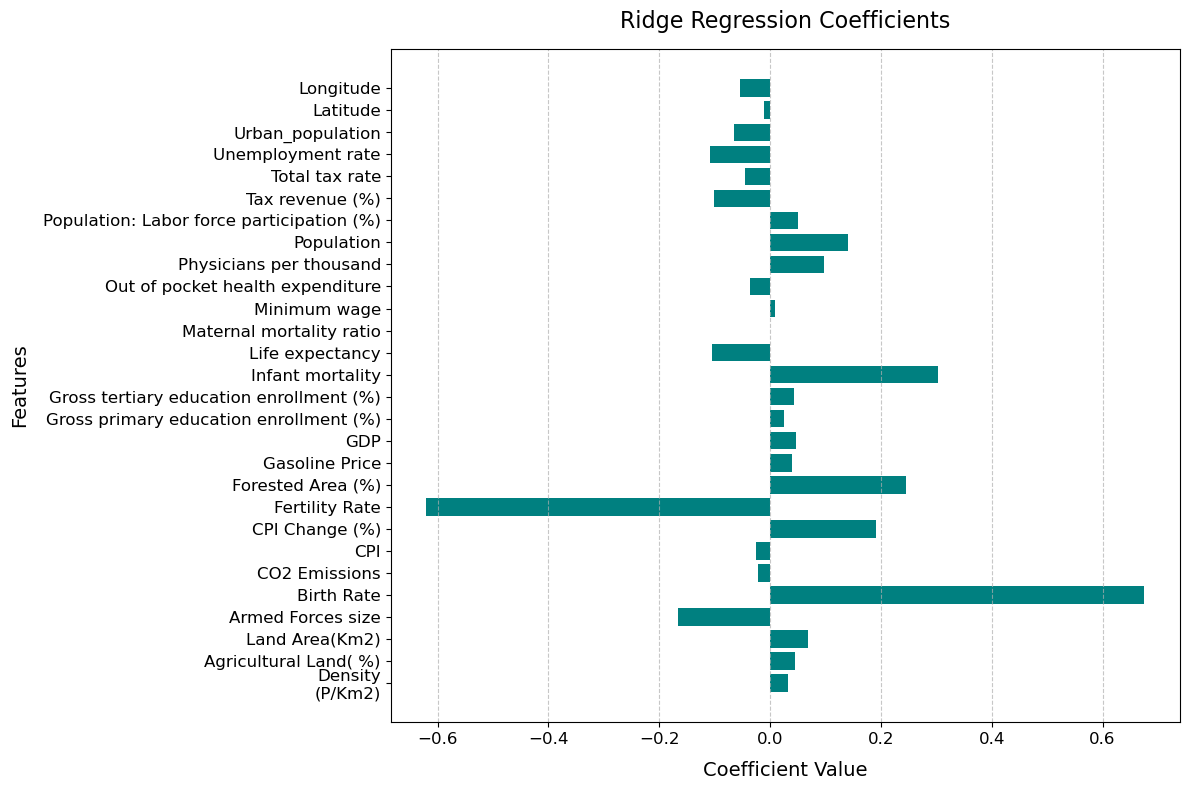

In [314]:
ridge = Ridge(alpha=0.3)
ridge.fit(X_train, y_train)
ridge_coef = ridge.coef_

y_pred = ridge.predict(X_test)

plt.figure(figsize=(12, 8))

# Horizontal bar plot
plt.barh(X.columns, ridge_coef, color='teal')

# Add labels and title
plt.xlabel('Coefficient Value', fontsize=14, labelpad=10)
plt.ylabel('Features', fontsize=14, labelpad=10)
plt.title('Ridge Regression Coefficients', fontsize=16, pad=15)

# Optional: Add gridlines for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Rotate the feature names for better readability (optional)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


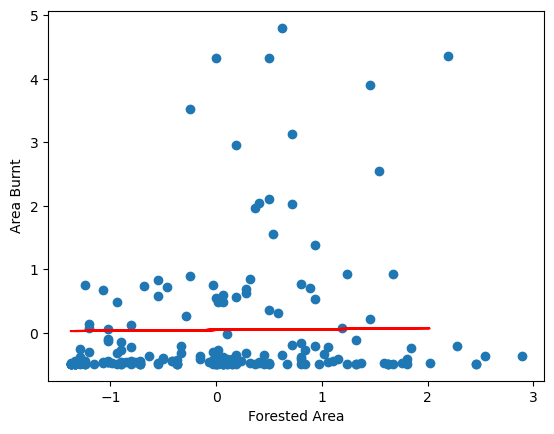

-0.03704465769410148
Index(['Annual share of the total land area burnt by wildfires',
       'Density\n(P/Km2)', 'Agricultural Land( %)', 'Land Area(Km2)',
       'Armed Forces size', 'Birth Rate', 'CO2 Emissions', 'CPI',
       'CPI Change (%)', 'Fertility Rate', 'Forested Area (%)',
       'Gasoline Price', 'GDP', 'Gross primary education enrollment (%)',
       'Gross tertiary education enrollment (%)', 'Infant mortality',
       'Life expectancy', 'Maternal mortality ratio', 'Minimum wage',
       'Out of pocket health expenditure', 'Physicians per thousand',
       'Population', 'Population: Labor force participation (%)',
       'Tax revenue (%)', 'Total tax rate', 'Unemployment rate',
       'Urban_population', 'Latitude', 'Longitude'],
      dtype='object')


In [315]:
X = merged_df["Forested Area (%)"].values.reshape(-1,1)

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.3 , random_state = 42)

reg = Lasso(alpha = 0.3)


reg.fit(X_train , y_train)

y_pred = reg.predict(X_test)

plt.scatter(X , y)

plt.plot(X_test , y_pred , color = 'r')

plt.xlabel("Forested Area")
plt.ylabel("Area Burnt")


plt.show()

print(reg.score(X_test, y_test))
print(merged_df.columns)

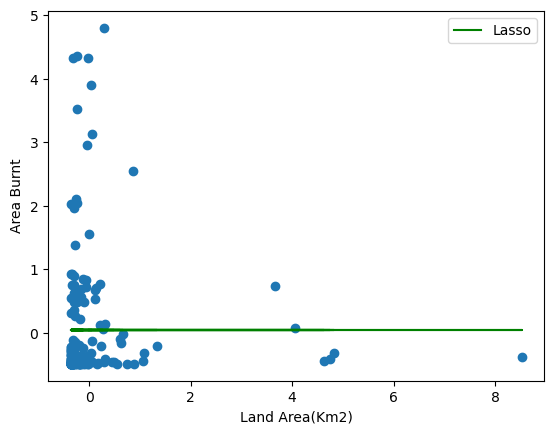

-0.03528009105815366


In [316]:
X = merged_df["Land Area(Km2)"].values.reshape(-1,1)

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.3 , random_state = 42)

# reg1 = LogisticRegression()
# reg1.fit(X_train, y_train)
# y_pred1 = reg1.predict(X_test)

reg2 = Lasso(alpha = 0.3)
reg2.fit(X_train , y_train)
y_pred2 = reg2.predict(X_test)

plt.scatter(X, y)
#plt.plot(X_test , y_pred1 , color = 'r', label="Logistic")
plt.plot(X_test , y_pred2 , color = 'g', label="Lasso")

plt.xlabel("Land Area(Km2)")
plt.ylabel("Area Burnt")
plt.legend()

plt.show()

#print(reg1.score(X_test, y_test))
print(reg2.score(X_test, y_test))

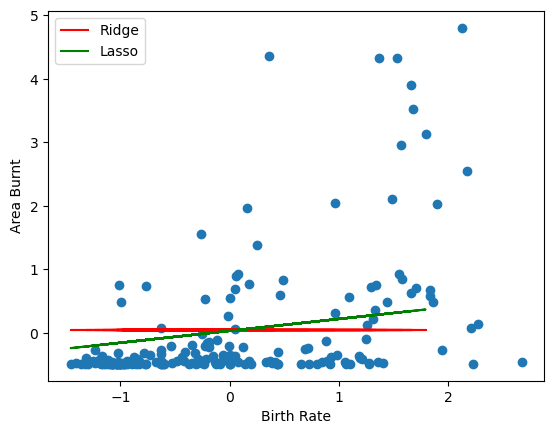

0.37098960923255064
0.2006842642058121


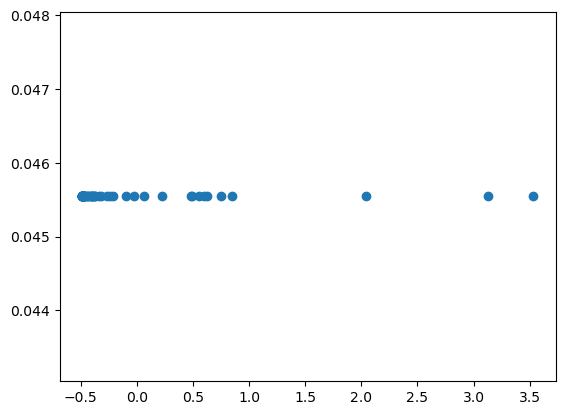

In [317]:
X = merged_df["Birth Rate"].values.reshape(-1,1)

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.3 , random_state = 42)

reg1 = Ridge(alpha = 0.3)
reg1.fit(X_train , y_train)
y_pred1 = reg2.predict(X_test)

reg2 = Lasso(alpha = 0.3)
reg2.fit(X_train , y_train)
y_pred2 = reg2.predict(X_test)

plt.scatter(X, y)
plt.plot(X_test , y_pred1 , color = 'r', label="Ridge")
plt.plot(X_test , y_pred2 , color = 'g', label="Lasso")

plt.xlabel("Birth Rate")
plt.ylabel("Area Burnt")
plt.legend()

plt.show()

plt.scatter(y_test, y_pred1)

print(reg1.score(X_test, y_test))
print(reg2.score(X_test, y_test))